# Assignment 2.1. - Using OLS

## DRW & UofC Quant Foundations
### Summer 2025
#### Mark Hendricks
#### hendricks@uchicago.edu

# Data
* This homework uses the file, `data/multi_asset_etf_data.xlsx`.
* Find the data in the Github repo associated with the module, (link on Canvas.)

$$\newcommand{\spy}{\text{spy}}$$
$$\newcommand{\hyg}{\text{hyg}}$$

The data file contains...
* Return rates, $r_t^i$, for various asset classes, (via ETFs.)
* Most notable among these securities is SPY, the return on the S&P 500. Denote this as $r^{\spy}_t$.
* A separate tab gives return rates for a particular portfolio, $r_t^p$.

# 1. Regression


***

In [127]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

path = '../data/multi_asset_etf_data.xlsx'

In [128]:
info = pd.read_excel(path, sheet_name='info').set_index('ticker')
info

,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
ticker,,,,,,
SPY,SPDR S&P 500,ETF,USD,50026094,572926853120,The trust seeks to achieve its investment obje...
EFA,iShares MSCI EAFE ETF,ETF,USD,7395415,60435103744,The fund generally will invest at least 80% of...
EEM,iShares MSCI Emerging Index Fun,ETF,USD,18043080,16526614528,The fund generally will invest at least 80% of...
PSP,Invesco Global Listed Private E,ETF,USD,21723,235239184,The fund generally will invest at least 90% of...
QAI,NYLI Hedge Multi-Strategy Track,ETF,USD,49670,687488448,"The fund is a ""fund of funds"" which means it i..."
HYG,iShares iBoxx $ High Yield Corp,ETF,USD,23767843,14188549120,The underlying index is a rules-based index co...
DBC,Invesco DB Commodity Index Trac,ETF,USD,465424,1206291584,The fund pursues its investment objective by i...
IYR,iShares U.S. Real Estate ETF,ETF,USD,3354686,3193291776,The fund seeks to track the investment results...
IEF,iShares 7-10 Year Treasury Bond,ETF,USD,7319141,34838351872,The underlying index measures the performance ...


In [129]:
returns = pd.read_excel(path, sheet_name='total returns', index_col=0)
returns.index = pd.to_datetime(ret.index)
returns

,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP,SHV
Date,,,,,,,,,,,,
2010-01-31,-0.036342,-0.050651,-0.077590,-0.003329,-0.015850,-0.018329,-0.078392,-0.054225,0.023702,-0.014605,0.015303,0.000272
2010-02-28,0.031194,0.002667,0.017764,0.021158,-0.000374,0.018734,0.041428,0.054571,0.003318,0.002418,-0.013031,0.000018
2010-03-31,0.060879,0.063854,0.081109,0.079607,0.019108,0.021335,-0.004655,0.097485,-0.010568,-0.000179,-0.000058,-0.000109
2010-04-30,0.015470,-0.028046,-0.001662,0.018182,-0.001838,0.019245,0.039116,0.063881,0.016527,-0.014474,0.025150,-0.000063
2010-05-31,-0.079455,-0.111928,-0.093936,-0.128968,-0.041621,-0.046756,-0.101473,-0.056835,0.029331,-0.036446,0.001917,0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,-0.024060,-0.029502,-0.016967,-0.051399,-0.015700,-0.007803,0.017227,-0.082892,-0.022584,-0.033754,-0.017144,0.004031
2025-01-31,0.026856,0.048009,0.021521,0.067995,0.016237,0.013605,0.027596,0.018913,0.006166,0.000935,0.013702,0.003633
2025-02-28,-0.012695,0.029531,0.011470,-0.040107,-0.005952,0.009703,0.001366,0.037861,0.027997,0.013991,0.021572,0.003115


In [130]:
portfolio_returns = pd.read_excel(path, sheet_name='portfolio returns', index_col=0)
portfolio_returns.index = pd.to_datetime(portfolio_returns.index)
portfolio_returns

,portfolio
Date,
2010-01-31,-0.012425
2010-02-28,0.019668
2010-03-31,0.046408
2010-04-30,0.024188
2010-05-31,-0.049523
...,...
2024-12-31,-0.043144
2025-01-31,0.027327
2025-02-28,0.004950


## 1.1
Estimate the regression of the portfolio return on SPY:

$$r^p_t = \alpha + \beta r^{\spy}_t + \epsilon_t^{p,\spy}$$

Specifically, report your estimates of alpha, beta, and the r-squared.

In [131]:
X = returns['SPY']
y = portfolio_returns['portfolio']
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()
print(model.summary())
print('alpha:', model.params.iloc[0])
print('beta:', model.params.iloc[1])
print('R-squared:', model.rsquared)

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     566.2
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           9.12e-58
Time:                        15:00:34   Log-Likelihood:                 513.29
No. Observations:                 184   AIC:                            -1023.
Df Residuals:                     182   BIC:                            -1016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.001     -1.451      0.1

## 1.2
Estimate the regression of the portfolio return on SPY and on HYG, the return on high-yield
corporate bonds, denoted as $r^{\hyg}_t$:

$$r^p_t = {\alpha} + {\beta}^{\spy}r^{\spy}_t + {\beta}^{\hyg}r^{\hyg}_t + {\epsilon}_t$$

Specifically, report your estimates of alpha, the betas, and the r-squared.

*Note that the parameters (such as $\beta^{\spy}$) in this multivariate model are not the same as used in the univariate model of part 1. 

In [132]:
X = returns[['SPY', 'HYG']]
y = portfolio_returns['portfolio']
X = sm.add_constant(X)  # Add a constant term for the intercept
model_multi = sm.OLS(y, X).fit()
print(model_multi.summary())
print('alpha:', model_multi.params.iloc[0])
print('beta_spy:', model_multi.params.iloc[1])
print('beta_hyg:', model_multi.params.iloc[2])
print('R-squared:', model_multi.rsquared)

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     419.4
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           1.13e-68
Time:                        15:00:34   Log-Likelihood:                 542.28
No. Observations:                 184   AIC:                            -1079.
Df Residuals:                     181   BIC:                            -1069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.001     -1.526      0.1

## 1.3
Calculate the series of fitted regression values, sometimes referred to as $\hat{y}$ in standard textbooks:

$$\hat{r}^p_t = \hat{\alpha} + \hat{\beta}^{\spy}r^{\spy}_t + \hat{\beta}^{\hyg}r^{\hyg}_t$$

Your statistical package will output these fitted values for you, or you can construct them using the estimated parameters.

How does this compare to the r-squared of the regression in problem 2?

In [133]:
portfolio_pred = model_multi.fittedvalues
port_pred_corr = portfolio_pred.corr(portfolio_returns['portfolio'])
print('Correlation between predicted and actual portfolio returns:', port_pred_corr)
print('Correlation squared:', port_pred_corr**2)
print('R-squared of the predicted portfolio returns:', model_multi.rsquared)


Correlation between predicted and actual portfolio returns: 0.9069180873254965
Correlation squared: 0.8225004171181369
R-squared of the predicted portfolio returns: 0.8225004171181376


The correlation between the portfolio returns and predicted portfolio returns squared is the R^2, as R^2 captures the correlation between the portfolio returns and the space spanned by all the regressors


## 1.4 
How do the SPY betas differ across the univariate and multivariate models? How does this relate to the
correlation between $r^{\spy}$ and $r^{\hyg}$?

In [134]:
single_spy = model.params['SPY']
multi_spy = model_multi.params['SPY']
print(f'Single factor SPY beta: {single_spy:.4f}')
print(f'Multi-factor SPY beta: {multi_spy:.4f}')

Single factor SPY beta: 0.6270
Multi-factor SPY beta: 0.3826


SPY beta decreases massively. This means there is high correlation between SPY and HYG, and that HYG better explains variation in the portfolio than SPY. Thus more beta is attributed to HYG and less to SPY

## 1.5
Without doing any calculation, would you expect the sample residual of the univariate regression or multivariate regression to have higher correlation to $r^{\hyg}$?

The sample residual of the univariate regression will have more correlation to HYG, because in the multivariate regression, the correlation to HYG has been removed by including HYG in the regression.

# 2. Decomposing and Replicating


## 2.1
The portfolio return, $r_t^p$, is a combination of the base assets that are provided here. Use linear regression to uncover which weights were used in constructing the portfolio.

$$r_t^p = \alpha +\left(\boldsymbol{\beta}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the individual securities.
* What does the regression find were the original weights?
* How precise is the estimation? Consider the R-squared and t-stats.

*Feel free to include an $\alpha$ in this model, even though you know the portfolio is an exact function of the individual securities. The estimation should find $\alpha$ of (nearly) zero.*



In [135]:
X = returns
X = sm.add_constant(X)  # Add a constant term for the intercept
y = portfolio_returns['portfolio']
model_all = sm.OLS(y, X).fit()
print(model_all.summary())
print('\nR-squared for all factors:', model_all.rsquared)

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.660e+29
Date:                Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:00:34   Log-Likelihood:                 6328.7
No. Observations:                 184   AIC:                        -1.263e+04
Df Residuals:                     171   BIC:                        -1.259e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.086e-16   2.78e-17      7.516      0.0

We can see that only PSP, QAI, IYR & IEF have significant beta's. Therefore, we can conclude that our portfolio is made up of equal parts of these 4 ETFs

In [136]:
X = returns[['PSP', 'QAI', 'IYR', 'IEF']]
y = portfolio_returns['portfolio']
X = sm.add_constant(X)  # Add a constant term for the intercept
model_selected = sm.OLS(y, X).fit()
print(model_selected.summary())
print('\nR-squared for selected factors:', model_selected.rsquared)

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.408e+32
Date:                Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                        15:00:34   Log-Likelihood:                 6893.2
No. Observations:                 184   AIC:                        -1.378e+04
Df Residuals:                     179   BIC:                        -1.376e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.391e-18    9.9e-19      4.434      0.0

***

## 2.2

$$\renewcommand{\targ}{EEM}$$

Suppose that we want to mimic a return, **EEM** using the other returns. Run the following regression–but
do so **only using data through the end of 2022.**

$$r_t^{\targ} = \alpha +\left(\boldsymbol{\beta}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the other securities, excluding the target, **EEM**.




In [137]:
X_2022 = returns.loc[returns.index <= '2022-12-31'].drop(columns='EEM')
y_2022 = returns.loc[returns.index <= '2022-12-31']['EEM']
X_2022 = sm.add_constant(X_2022)
model_2022 = sm.OLS(y_2022, X_2022).fit()


#### (a) 
Report the r-squared and the estimate of the vector, $\boldsymbol{\beta}$.

In [138]:
model_2022_summary = model_2022.summary()
model_2022_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EEM   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     43.24
Date:                Mon, 23 Jun 2025   Prob (F-statistic):           3.73e-40
Time:                        15:00:34   Log-Likelihood:                 348.19
No. Observations:                 156   AIC:                            -672.4
Df Residuals:                     144   BIC:                            -635.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.003      0.521      0.603      -0.004       0.007
SPY           -0.2393      0.154     -1.555      0.122      -0.543       0.065
EFA            0.5338      0.145      3.672      0.000       0.246       0.821
PSP            0.0037      0.119      0.031      0.975      -0.232       0.240
QAI            1.1292      0.375      3.015      0.003       0.389       1.870
HYG           -0.0069      0.194     -0.036      0.972      -0.391       0.377
DBC            0.0212      0.062      0.340      0.734      -0.102       0.145
IYR            0.0785      0.082      0.953      0.342      -0.084       0.241
IEF           -0.8116      0.272     -2.988      0.003      -1.349      -0.275
BWX            0.5937      0.169      3.504      0.001       0.259       0.929
TIP            0.2940      0.295      0.997      0.321      -0.289       0.877
SHV            0.6187      2.745      0.225      0.822      -4.807       6.044
==============================================================================
Omnibus:                        0.066   Durbin-Watson:                   2.334
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.209
Skew:                           0.005   Prob(JB):                        0.901
Kurtosis:                       2.821   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The explanatory terms (with low p-value) are EFA, QAI, IEF, BWX

#### (b) 
Report the t-stats of the explanatory returns. Which have absolute value greater than 2?



In [139]:
print('EFA beta:', round(model_2022.params['EFA'], 3), 'T-statistic:', round(model_2022.tvalues['EFA'], 3))
print('QAI beta:', round(model_2022.params['QAI'], 3), 'T-statistic:', round(model_2022.tvalues['QAI'], 3))
print('IEF beta:', round(model_2022.params['IEF'], 3), 'T-statistic:', round(model_2022.tvalues['IEF'], 3))
print('BWX beta:', round(model_2022.params['BWX'], 3), 'T-statistic:', round(model_2022.tvalues['BWX'], 3))

EFA beta: 0.534 T-statistic: 3.672
QAI beta: 1.129 T-statistic: 3.015
IEF beta: -0.812 T-statistic: -2.988
BWX beta: 0.594 T-statistic: 3.504


#### (c) 
Plot the returns of **EEM** along with the replication values.

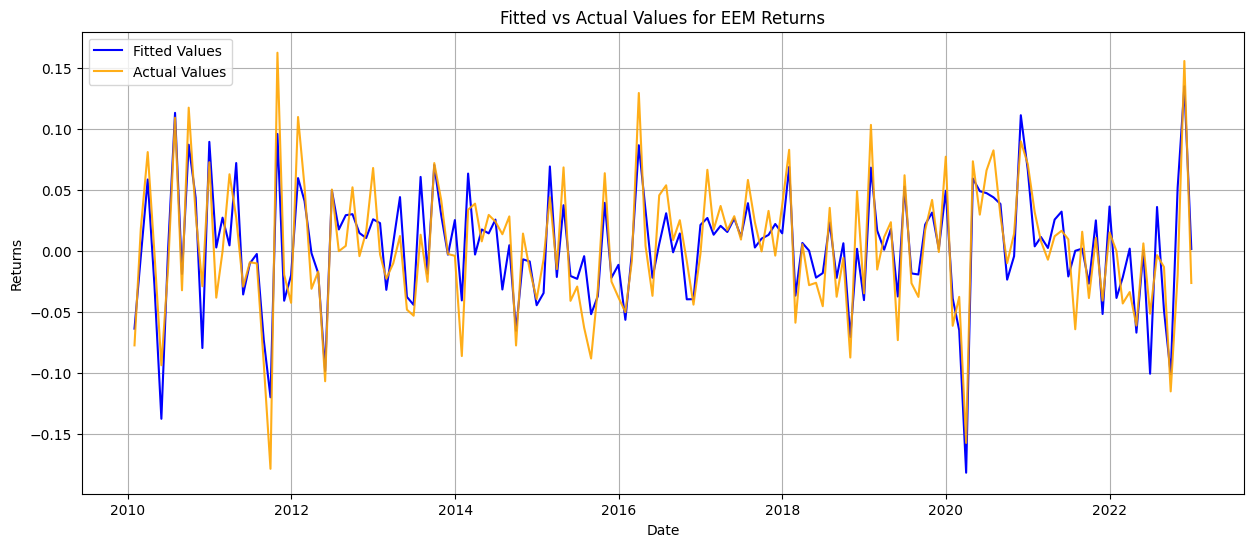

In [142]:
plt.figure(figsize=(15, 6))
plt.plot(model_2022.fittedvalues, label='Fitted Values', color='blue')
plt.plot(y_2022, label='Actual Values', color='orange', alpha=0.9)
plt.title('Fitted vs Actual Values for EEM Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid()
plt.show()

## 2.3
Perhaps the replication results in the previous problem are overstated given that they estimated the parameters within a sample and then evaluated how well the result fit in the same sample. This is known as in-sample fit.

Using the estimates through **2022**, (the α and βˆ from the previous problem,) calculate the out-of-sample (OOS) values of the replication, using the **2023-2024** returns, denoted $\boldsymbol{r}_t^{\text{oos}}$:

$$\hat{r}_t^{\targ} = \left(\widehat{\boldsymbol{\beta}}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t^{\text{oos}}$$

#### (a) 
What is the correlation between $\hat{r}_t^{\targ}$ and $\boldsymbol{r}_t^{\text{oos}}$?


In [146]:
X_2023 = returns.loc[returns.index > '2022-12-31'].drop(columns='EEM')
y_2023 = returns.loc[returns.index > '2022-12-31']['EEM']
X_2023 = sm.add_constant(X_2023)

y_hat_2023 = model_2022.predict(X_2023)
corr_2023 = y_2023.corr(y_hat_2023)
print('Correlation between actual and predicted EEM returns OOS:', corr_2023)
print('OOS R-squared:', corr_2023**2)

print('In-sample R-squared:', model_2022.rsquared)


Correlation between actual and predicted EEM returns OOS: 0.8186758448062701
OOS R-squared: 0.6702301388692601
In-sample R-squared: 0.7676040659502019



#### (b) 
How does this compare to the r-squared from the regression above based on in-sample data, (through 2020?)

The out of sample R^2 is lower than the in sample R^2